<a href="https://colab.research.google.com/github/anajonicholson/DS4002-Project2/blob/main/SCRIPTS/appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was made for providing the proper statistics required in the data appendix.



In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# total healthcare costs for entire state (in millions of dollars)
personal_healthcare = pd.read_csv("https://raw.githubusercontent.com/anajonicholson/DS4002-Project2/refs/heads/main/DATA/personal_healthcare_expenses_cleaned.csv")

# population by state per year
state_populations = pd.read_csv("https://raw.githubusercontent.com/anajonicholson/DS4002-Project2/refs/heads/main/DATA/state_population_cleaned.csv")

# median household salary per state
annual_salary = pd.read_csv("https://raw.githubusercontent.com/anajonicholson/DS4002-Project2/refs/heads/main/DATA/average_salary_state.csv")

# enrollment numbers per state
medicaid_enrollment = pd.read_csv("https://raw.githubusercontent.com/anajonicholson/DS4002-Project2/refs/heads/main/DATA/medicaid_enrollment_cleaned.csv")

In [37]:
print(personal_healthcare.shape)
personal_healthcare.drop(columns=["Average_Expense"], inplace=True)

healthcare_adjusted = personal_healthcare.melt(id_vars=["State"], var_name="Year", value_name="Healthcare Expenses")
healthcare_adjusted["Year"] = healthcare_adjusted["Year"].astype(int)
healthcare_adjusted["Healthcare Expenses"] = healthcare_adjusted["Healthcare Expenses"].astype(float)

# summary_stats = healthcare_long_df["Healthcare Expenses"].describe(percentiles=[0.25, 0.5, 0.75]).to_frame()
# summary_stats
healthcare_adjusted = healthcare_adjusted.sort_values(by="State")
healthcare_adjusted

(51, 9)


,State,Year,Healthcare Expenses
24,Alabama,2014,35248.0
228,Alabama,2018,40810.0
177,Alabama,2017,39778.0
75,Alabama,2015,37172.0
330,Alabama,2020,45673.0
...,...,...,...
299,Wyoming,2019,5866.0
44,Wyoming,2014,4822.0
248,Wyoming,2018,5667.0
350,Wyoming,2020,6399.0


In [38]:
state_populations.drop(51, inplace=True)
print(state_populations.shape)
pop_adjusted = state_populations.melt(id_vars=["State"], var_name="Year", value_name="Population")
pop_adjusted["Year"] = pop_adjusted["Year"].astype(int)
pop_adjusted["Population"] = pop_adjusted["Population"].astype(float)
pop_adjusted

(51, 8)


,State,Year,Population
0,Alabama,2014,4843737.0
1,Alaska,2014,737075.0
2,Arizona,2014,6732873.0
3,Arkansas,2014,2968759.0
4,California,2014,38586706.0
...,...,...,...
352,Virginia,2020,8590563.0
353,Washington,2020,7693612.0
354,West Virginia,2020,1784787.0
355,Wisconsin,2020,5832655.0


In [39]:
annual_salary.drop(columns=["2021", "2022", "2023"], inplace=True) # to keep consistency across years
print(annual_salary.shape)
salary_adjusted = annual_salary.melt(id_vars=["State"], var_name="Year", value_name="Average Salary")
salary_adjusted["Year"] = salary_adjusted["Year"].astype(int)
salary_adjusted["Average Salary"] = salary_adjusted["Average Salary"].astype(float)
salary_adjusted

(51, 8)


,State,Year,Average Salary
0,Alabama,2014,53070.0
1,Alaska,2014,84900.0
2,Arizona,2014,61830.0
3,Arkansas,2014,56390.0
4,California,2014,75930.0


In [40]:
print(medicaid_enrollment.shape)
medicaid_enrollment.drop(columns=["Average_Enrollment"], inplace=True)
medicaid_adjusted = medicaid_enrollment.melt(id_vars=["State"], var_name="Year", value_name="Medicaid Enrollment")
medicaid_adjusted["Year"] = medicaid_adjusted["Year"].astype(int)
medicaid_adjusted["Medicaid Enrollment"] = medicaid_adjusted["Medicaid Enrollment"].astype(float)
medicaid_adjusted = medicaid_adjusted.sort_values(by="State")
medicaid_adjusted

(51, 9)


,State,Year,Medicaid Enrollment
24,Alabama,2014,1007.0
228,Alabama,2018,1030.0
177,Alabama,2017,1035.0
75,Alabama,2015,1034.0
330,Alabama,2020,1096.0
...,...,...,...
299,Wyoming,2019,57.0
44,Wyoming,2014,71.0
248,Wyoming,2018,60.0
350,Wyoming,2020,61.0


Summary statistics for State Population (2014-2020):
 count    3.570000e+02
mean     6.364066e+06
std      7.203519e+06
min      5.790540e+05
25%      1.784787e+06
50%      4.455590e+06
75%      7.299961e+06
max      3.943761e+07
Name: Population, dtype: float64


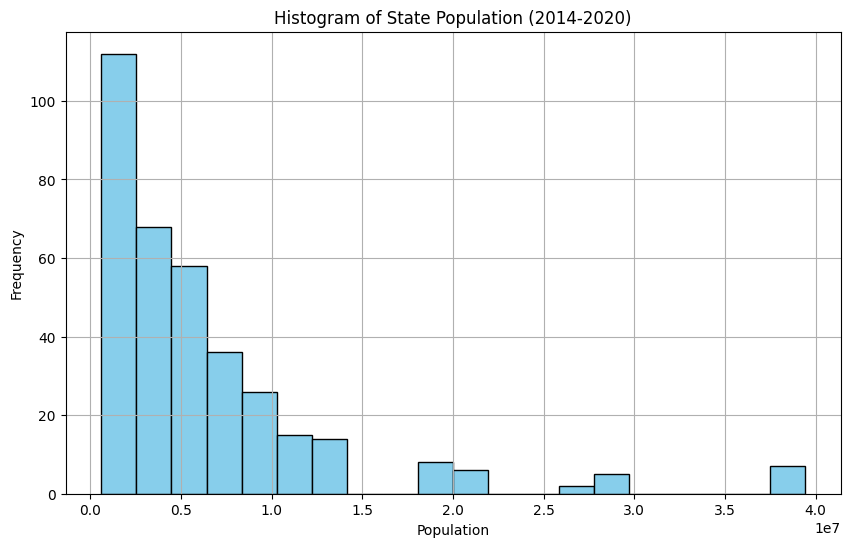

Summary statistics for Average Annual Salary per State (2014-2020):
 count       357.000000
mean      75698.767507
std       13020.940595
min       44590.000000
25%       66650.000000
50%       74370.000000
75%       84900.000000
max      113000.000000
Name: Average Salary, dtype: float64


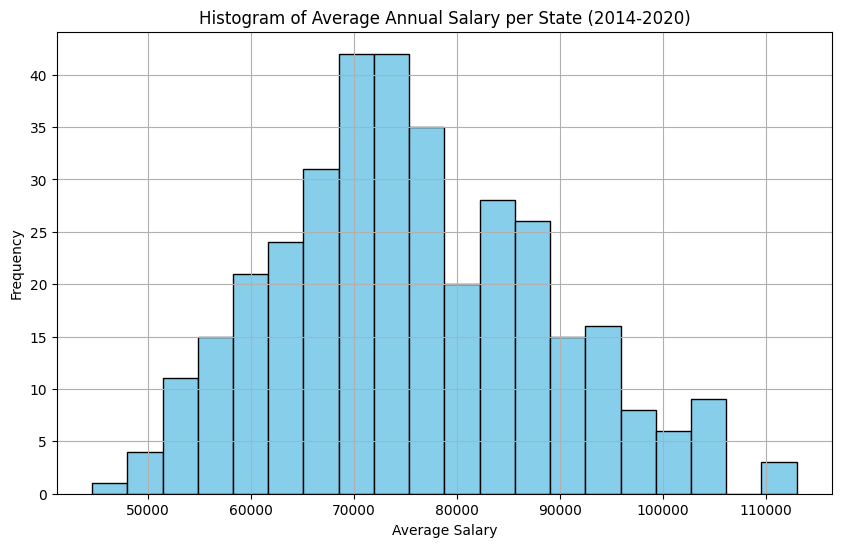

Summary statistics for Medicaid Enrollment (2014-2020):
 count      357.000000
mean      1421.044818
std       1811.719938
min         57.000000
25%        301.000000
50%       1034.000000
75%       1616.000000
max      11718.000000
Name: Medicaid Enrollment, dtype: float64


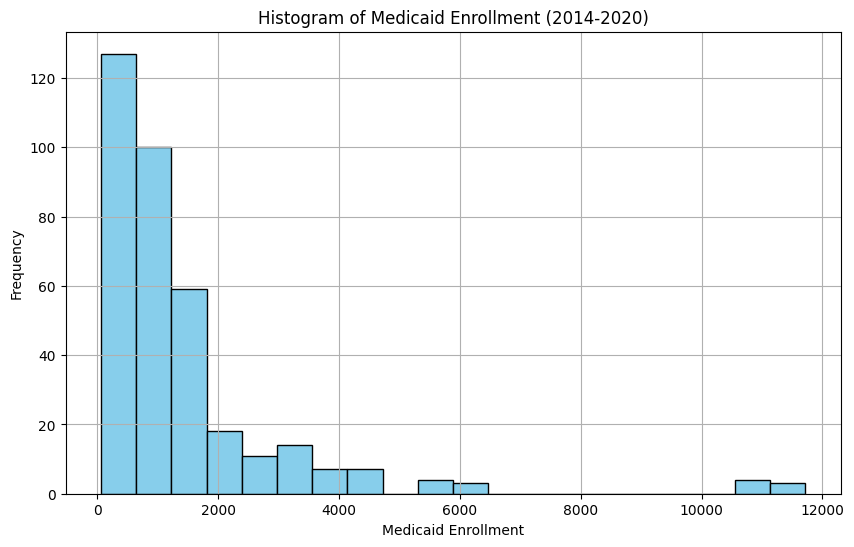

In [41]:
# will generate summary statistics and histogram for any given dataset
def summary_and_histogram(df, value_column, title):
    # summary_stats = df.groupby("Year")[value_column].describe(percentiles=[.25, .5, .75])
    summary_stats = df[value_column].describe(percentiles=[.25, .5, .75])
    print(f"Summary statistics for {title}:\n", summary_stats)

    # histogram figure
    plt.figure(figsize=(10, 6))
    df[value_column].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {title}")
    plt.xlabel(value_column)
    plt.ylabel("Frequency")
    plt.show()

# summary_and_histogram(healthcare_adjusted, 'Healthcare Expenses', 'State Population (2014-2020)')
summary_and_histogram(pop_adjusted, 'Population', 'State Population (2014-2020)')
summary_and_histogram(salary_adjusted, 'Average Salary', 'Average Annual Salary per State (2014-2020)')
summary_and_histogram(medicaid_adjusted, 'Medicaid Enrollment', 'Medicaid Enrollment (2014-2020)')


Summary statistics for Healthcare Expenses per State (2014-2020):
        Healthcare Expenses
count           357.000000
mean          57301.823529
std           64996.343200
min            4822.000000
25%           15391.000000
50%           38322.000000
75%           68253.000000
max          405451.000000


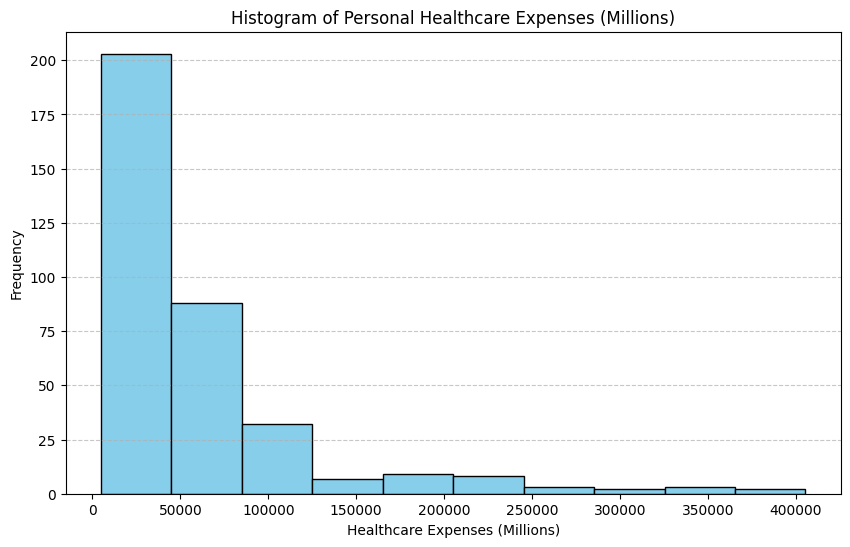

In [42]:
summary_stats = healthcare_adjusted["Healthcare Expenses"].describe(percentiles=[0.25, 0.5, 0.75]).to_frame()
print(f"Summary statistics for Healthcare Expenses per State (2014-2020):\n", summary_stats)

plt.figure(figsize=(10, 6))
plt.hist(healthcare_adjusted["Healthcare Expenses"], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of Personal Healthcare Expenses (Millions)")
plt.xlabel("Healthcare Expenses (Millions)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [45]:
results = pd.read_csv('https://raw.githubusercontent.com/anajonicholson/DS4002-Project2/refs/heads/main/DATA/results.csv')
results.rename(columns={'Medicaid_Coef': 'Medicaid Correlation Coefficient'}, inplace=True)
print(results.shape)
results

(51, 8)


,State,Medicaid Correlation Coefficient,Medicaid_P_Value,AR_Coef,AR_P_Value,MA_Coef,MA_P_Value,AIC
0,Alabama,0.010667,0.443224,-0.914931,1.077073e-01,0.012547,0.997577,11.427739
1,Alaska,0.027814,0.049706,-0.110476,9.646533e-01,-0.997719,0.997664,24.207243
2,Arizona,-0.000817,0.576491,-0.852135,4.706835e-02,-0.985137,0.980994,13.897092
3,Arkansas,0.008554,0.785193,0.735628,9.585571e-01,-0.490386,0.974753,21.709913
4,California,0.000179,0.883108,-0.676955,8.919820e-01,0.327202,0.971074,15.338252
5,Colorado,-0.005356,0.030116,0.126796,9.509061e-01,0.995811,0.992233,13.946338
6,Connecticut,0.007142,0.005474,-0.660387,4.359381e-01,-0.990556,0.985344,18.119588
7,Delaware,0.060968,0.643950,-0.946617,4.057664e-02,0.414796,0.880042,15.326326
8,District of Columbia,-0.030576,0.193644,0.039542,9.739385e-01,-0.998480,0.997115,19.503983
9,Florida,0.000988,0.705949,0.000818,9.999992e-01,0.000813,0.999999,13.311797


Summary statistics for Medicaid Enrollment Correlation Coefficient:
 count    51.000000
mean      0.009834
std       0.025701
min      -0.030576
25%      -0.000410
50%       0.001687
75%       0.009755
max       0.116948
Name: Medicaid Correlation Coefficient, dtype: float64


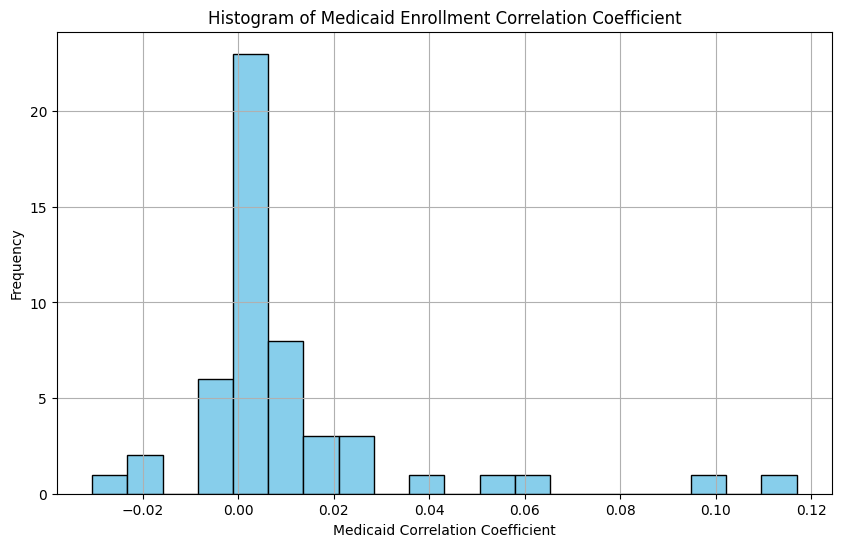

In [46]:
summary_and_histogram(results, 'Medicaid Correlation Coefficient', 'Medicaid Enrollment Correlation Coefficient')